In [1]:
#Store these environment variables for later
la_vaca = 'moo'
ben = 'yees?'

In [2]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn import svm

from imblearn.over_sampling import SMOTE


In [3]:
processed_df = pd.read_pickle('../data/processed_df.pkl')

In [4]:
X = processed_df.drop(columns = ['emotion', 'sentiment', 'tweet_text', 'tweet_tokens'])
y = processed_df['sentiment']

In [5]:
#Listing the features we want to join back
features = ['char_count', 'word_count', 'sent_count',
       'capital_char_count', 'capital_word_count', 'quoted_word_count',
       'stopword_count', 'unique_word_count', 'htag_count', 'mention_count',
       'avg_wordlength', 'avg_sentlength', 'unique_vs_words',
       'stopwords_vs_words']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .1, stratify = y)

In [7]:
X_train

,char_count,word_count,sent_count,capital_char_count,capital_word_count,quoted_word_count,stopword_count,unique_word_count,htag_count,mention_count,avg_wordlength,avg_sentlength,unique_vs_words,stopwords_vs_words,string_tokens
3835,144,17,2,0,0,0,2,17,0,0,8.470588,8.500000,1.000000,0.117647,contextual discovery search combine calendar w...
2778,119,21,2,2,0,0,9,18,0,0,5.666667,10.500000,0.857143,0.428571,happen party stay party wait inbox wakeup
4134,127,21,2,6,1,0,5,21,0,0,6.047619,10.500000,1.000000,0.238095,casually mention forecast dow day ahead base m...
7602,101,17,1,4,0,0,5,16,0,0,5.941176,17.000000,0.941176,0.294118,maybe strange logo last autumn obscure hint ci...
2104,115,21,3,9,2,0,6,21,0,0,5.476190,7.000000,1.000000,0.285714,dude actually buy tomorrow temporary store dow...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3878,108,18,3,8,1,0,6,17,0,0,6.000000,6.000000,0.944444,0.333333,man launch circle talk strike iron hot
5212,126,25,3,17,4,0,9,23,0,0,5.040000,8.333333,0.920000,0.360000,open store release amp quite scene geek power
7696,144,24,4,10,1,0,5,24,0,0,6.000000,6.000000,1.000000,0.208333,wishful several semi fill surround tech geek m...
1138,133,22,2,10,2,0,11,20,0,0,6.045455,11.000000,0.909091,0.500000,expectation engagement visual social delving e...


In [8]:
vectorizer = TfidfVectorizer()
train_tf_idf_features =  vectorizer.fit_transform(X_train['string_tokens']).toarray()
test_tf_idf_features = vectorizer.transform(X_test['string_tokens']).toarray()

# Converting above list to DataFrame
train_tf_idf = pd.DataFrame(train_tf_idf_features)
test_tf_idf = pd.DataFrame(test_tf_idf_features)

# Finally join all features with above TF-IDF. 
X_train = pd.DataFrame.join(train_tf_idf, X_train[features].reset_index(), how = 'left')
X_test = pd.DataFrame.join(test_tf_idf, X_test[features].reset_index(), how = 'left')

In [9]:
X_test

,0,1,2,3,4,5,6,7,8,9,...,capital_word_count,quoted_word_count,stopword_count,unique_word_count,htag_count,mention_count,avg_wordlength,avg_sentlength,unique_vs_words,stopwords_vs_words
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,5,19,0,0,5.952381,5.25,0.904762,0.238095
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,5,18,0,0,5.444444,6.00,1.000000,0.277778
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,6,17,0,0,6.277778,9.00,0.944444,0.333333
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,4,15,0,0,5.533333,15.00,1.000000,0.266667
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,6,19,0,0,5.894737,9.50,1.000000,0.315789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,10,24,0,0,5.360000,12.50,0.960000,0.400000
607,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,0,6,20,0,0,5.380952,7.00,0.952381,0.285714
608,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,0,6,21,0,0,5.904762,10.50,1.000000,0.285714
609,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,1,17,0,0,7.058824,17.00,1.000000,0.058824


In [10]:
# oversample = SMOTE()
# X_train, y_train = oversample.fit_resample(X_train, y_train)

In [11]:
k_neighbors = KNeighborsClassifier()

k_neighbors.fit(X_train, y_train)


KNeighborsClassifier()

In [12]:
y_preds_k = k_neighbors.predict(X_test)

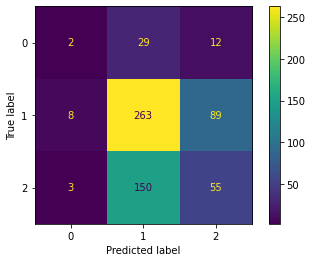

In [13]:
plot_confusion_matrix(k_neighbors, X_test, y_test)

In [14]:
print(classification_report(y_preds_k, y_test))

              precision    recall  f1-score   support

           0       0.05      0.15      0.07        13
           1       0.73      0.60      0.66       442
           2       0.26      0.35      0.30       156

    accuracy                           0.52       611
   macro avg       0.35      0.37      0.34       611
weighted avg       0.60      0.52      0.55       611



In [15]:
rfc = RandomForestClassifier()

rfc.fit(X_train, y_train)

y_preds_rfc = rfc.predict(X_test)

KeyboardInterrupt: 

In [ ]:
print(classification_report(y_preds_rfc, y_test))

              precision    recall  f1-score   support

           0       0.21      0.82      0.33        11
           1       0.91      0.65      0.76       499
           2       0.31      0.63      0.41       101

    accuracy                           0.65       611
   macro avg       0.47      0.70      0.50       611
weighted avg       0.79      0.65      0.69       611



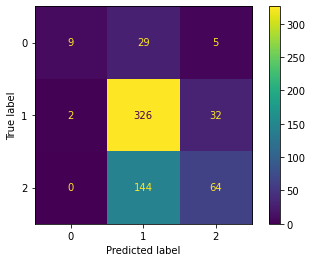

In [ ]:
plot_confusion_matrix(rfc, X_test, y_test)

In [ ]:
rfc_grid = {'n_estimators': np.arange(50, 100, 10),
    'max_depth': np.arange(3, 15, 4),
    'criterion': ['gini', 'entropy']
}

In [ ]:
rfc_cv = GridSearchCV(estimator = rfc, param_grid = rfc_grid, cv = 5)

In [ ]:
#rfc_cv.fit(X_train_vect, y_train)

In [ ]:
#best_rfc = rfc_cv.best_estimator_

In [ ]:
#rfc_cv.best_params_

In [ ]:
#print(classification_report(best_rfc.predict(X_test_vect), y_test))

In [ ]:
#plot_confusion_matrix(best_rfc, X_test_vect, y_test)

In [ ]:
svcl = svm.SVC()

svcl.fit(X_train, y_train)

y_pred_sv = svcl.predict(X_test)

In [ ]:
print(classification_report(svcl.predict(X_test), y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.59      0.74       611
           2       0.00      0.00      0.00         0

    accuracy                           0.59       611
   macro avg       0.33      0.20      0.25       611
weighted avg       1.00      0.59      0.74       611



/Library/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


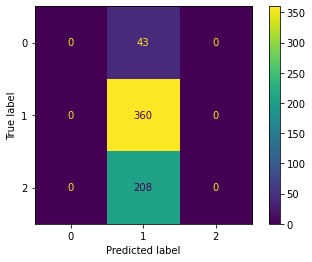

In [ ]:
plot_confusion_matrix(svcl, X_test, y_test)

In [ ]:
params = {'kernel':('linear', 'rbf'), 'C':[1, 10, 100]}
clf_sv = GridSearchCV(svcl, params)
clf_sv.fit(X_train, y_train)


KeyboardInterrupt: 

In [ ]:
best_sv = clf_sv.best_estimator_

In [ ]:
print(classification_report(best_sv.predict(X_test_vect), y_test))

              precision    recall  f1-score   support

           0       0.50      0.09      0.15       120
           1       0.32      0.68      0.43        84
           2       0.39      0.40      0.40       102

    accuracy                           0.36       306
   macro avg       0.40      0.39      0.33       306
weighted avg       0.41      0.36      0.31       306



/Users/markhurtado/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


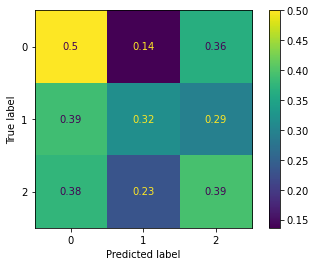

In [ ]:
plot_confusion_matrix(best_sv, X_test_vect, y_test, normalize = 'true')

In [ ]:
mnb = MultinomialNB()

mnb.fit(X_train, y_train)

y_preds_mnb = mnb.predict(X_test)


In [ ]:
print(classification_report(mnb.predict(X_test), y_test))

              precision    recall  f1-score   support

           0       0.23      0.10      0.14        96
           1       0.66      0.65      0.66       362
           2       0.34      0.46      0.39       153

    accuracy                           0.52       611
   macro avg       0.41      0.41      0.40       611
weighted avg       0.51      0.52      0.51       611



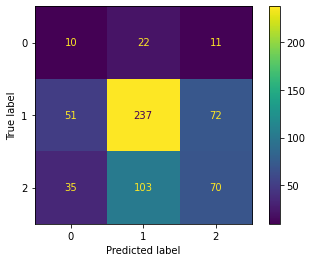

In [ ]:
plot_confusion_matrix(mnb, X_test, y_test)

In [ ]:
cnb = ComplementNB()

cnb.fit(X_train, y_train)

y_preds_mnb = cnb.predict(X_test)

In [ ]:
print(classification_report(cnb.predict(X_test), y_test))

              precision    recall  f1-score   support

           0       0.07      0.19      0.10        16
           1       0.62      0.66      0.64       337
           2       0.52      0.42      0.47       258

    accuracy                           0.55       611
   macro avg       0.40      0.42      0.40       611
weighted avg       0.56      0.55      0.55       611



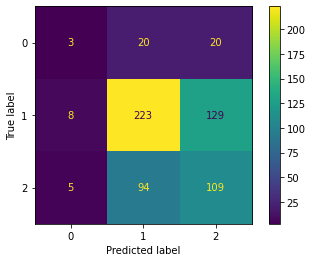

In [ ]:
plot_confusion_matrix(cnb, X_test, y_test)